In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import warnings
warnings.filterwarnings("ignore")

### Demos 1 & 2

**USING THE corner DEMO DATA FROM https://corner.readthedocs.io/en/latest/pages/custom**

Generate the data

In [7]:
ndim, nsamples = 4, 50000 
np.random.seed(1234)
data1 = np.random.randn(ndim * 4 * nsamples // 5).reshape(
    [4 * nsamples // 5, ndim]
)
mean = 4 * np.random.rand(ndim)
data2 = mean[None, :] + np.random.randn(ndim * nsamples // 5).reshape(
    [nsamples // 5, ndim]
)
samples = np.vstack([data1, data2]); print(samples)

[[ 0.47143516 -1.19097569  1.43270697 -0.3126519 ]
 [-0.72058873  0.88716294  0.85958841 -0.6365235 ]
 [ 0.01569637 -2.24268495  1.15003572  0.99194602]
 ...
 [ 4.42510225  0.26847541  1.97209812  0.45052213]
 [ 2.63068782  1.34164265  2.16147582 -0.1408126 ]
 [ 1.62859825  2.91579255  3.5037817  -0.38574019]]


In [8]:
import scorner as sc

**Demo 1 - minimum working code. Using test_run=True option as can take a while**

Testing on 500 rows


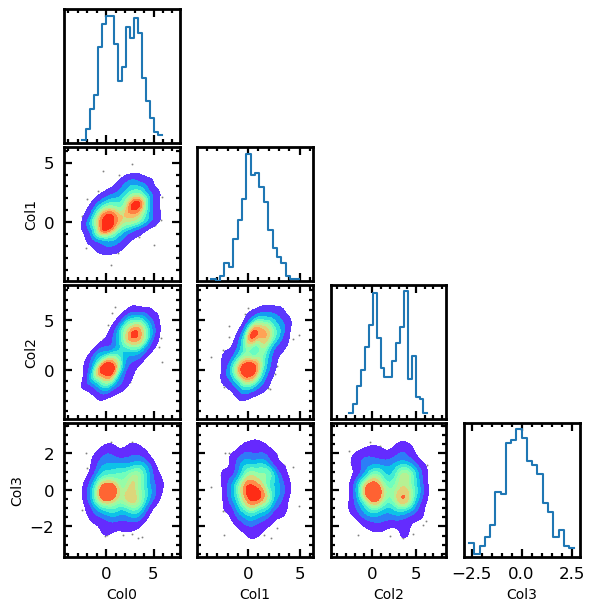

In [9]:
sc.scorner(samples,test_run=True)

CF. 1 PLOT ON https://corner.readthedocs.io/en/latest/pages/custom

**Demo 2 - showing the true values and the distribution statistics (above the panel)**

Testing on 500 rows


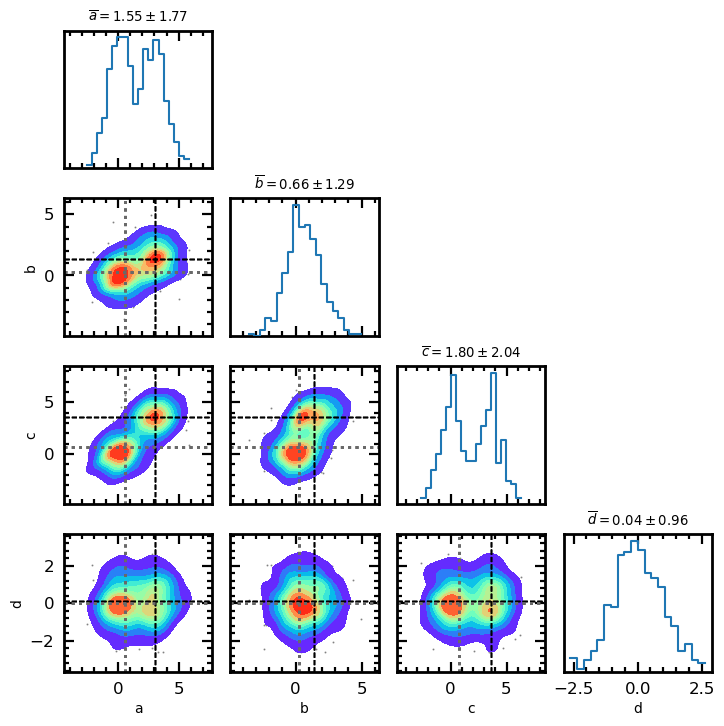

In [14]:
# Putting in two sets of true values as an array
value1 = mean; value2 = np.mean(samples, axis=0)
true_v = list(value1) + list(value2) # TRUE VALUES IN A SINGLE ARRAY
true_v =  np.reshape(true_v,(2,-1)) 
true_s = [['--',1,'k'],['dotted',2,'dimgrey']] # TRUE VALUE LINE STYLES

sc.scorner(samples,test_run=True,true_values=true_v,true_style = true_s,
           cols = ['a','b','c','d'],height = 1.8, fs=10,tlp = 0.5,
          show_stats=True,stats_in = False)

### Demo 3 - input direct from an existing array

**Showing the true values and the distribution statistics (in panel)**

Plot written to MC.png


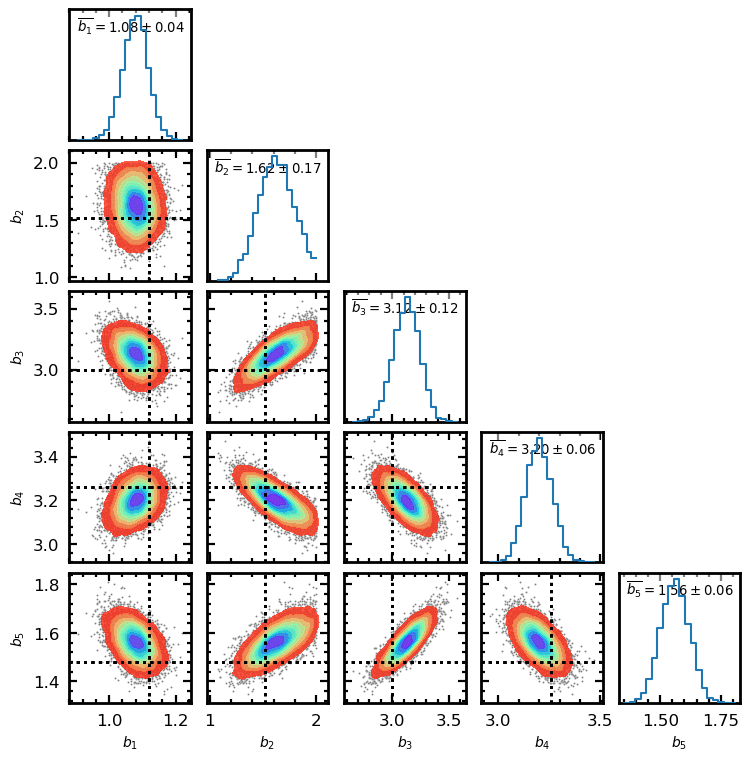

In [11]:
MC_data= np.load('MC_chain_data.npy')
sc.scorner(MC_data, cols = ["$b_1$","$b_2$","$b_3$","$b_4$","$b_5$"],
                 true_values=[1.12, 1.52, 3, 3.26, 1.48],# test_run = True,
                 dens_alpha = 0.8,show_stats=True, tlp= 0.3, cmap = 'rainbow_r',
                 hc =True, plot_form='png',plot_name = 'MC'
                 )